<a href="https://colab.research.google.com/github/Quiteria89/Deploy-Web/blob/master/desafio_6_2020_env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [171]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [172]:
# Primeiro, realizamos a instalação do scikit-learn versão 0.20.0 no Kernel deste notebook:
#!pip3 install scikit-learn==0.20.0 --upgrade
# caso você não tem essa biblioteca instalada use o comando abaixo.
!pip3 install imblearn

In [173]:
#!pip install imblearn --upgrade
!pip3 install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


## Download dos conjuntos de dados em formato .csv

In [174]:
# Importando os módulos:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Pacote para construção de modelo baseado na técnica Gradient Boosting
#import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
# Pacote com métodos numéricos e representações matriciais
import numpy as np


In [175]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
#df_training_dataset = pd.read_csv(r'/content/training_dataset.csv',sep=',')
df_training_dataset.tail()

--2020-09-18 18:22:01--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1736600 (1.7M) [text/plain]
Saving to: ‘training_dataset.csv’

training_dataset.cs 100%[===================>]   1.66M  --.-KB/s    in 0.1s    

2020-09-18 18:22:01 (14.5 MB/s) - ‘training_dataset.csv’ saved [1736600/1736600]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15847,722542433.0,Bacharelado,NaN,Engenheiro,servicos,1.0,1.0,1.0,6.0,Outros,515.0,166.0,102.0,0.0,perfil4
15848,931753956.0,SEM FORMAÇÃO,UFRN,Supervisor,Siderurgica,0.0,0.0,1.0,8.0,Instagram,54.0,37.0,31.0,0.0,perfil2
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários da plataforma:

**id**

**graduacao**

**universidade**

**profissao**

**organizacao**

**pretende_fazer_cursos_lit**

**interesse_mba_lit**

**importante_ter_certificado**

**horas_semanais_estudo**

**como_conheceu_lit**

**total_modulos**

**modulos_iniciados**

**modulos_finalizados**

**certificados**

**categoria**

In [176]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12329 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          10847 non-null  float64
 1   graduacao                   10841 non-null  object 
 2   universidade                10843 non-null  object 
 3   profissao                   10875 non-null  object 
 4   organizacao                 10847 non-null  object 
 5   pretende_fazer_cursos_lit   10845 non-null  float64
 6   interesse_mba_lit           10881 non-null  float64
 7   importante_ter_certificado  10830 non-null  float64
 8   horas_semanais_estudo       10857 non-null  float64
 9   como_conheceu_lit           10844 non-null  object 
 10  total_modulos               12329 non-null  float64
 11  modulos_iniciados           10912 non-null  float64
 12  modulos_finalizados         10853 non-null  float64
 13  certificados                123

In [177]:
df_training_dataset.nunique()

id                            10847
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   560
modulos_iniciados               352
modulos_finalizados             316
certificados                     20
categoria                         6
dtype: int64

<hr>

## Detalhamento do desafio: classificação multiclasse

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de uma plataforma de ensino. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``categoria``

<hr>

## Pre-processando o dataset antes do treinamento

### Removendo todas as linhas que possuem algum valor nulos em determinadas colunas

Usando o método Pandas **DataFrame.dropna()** você pode remover todas as linhas nulas do dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [178]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação DropNA: 

id                            1482
graduacao                     1488
universidade                  1486
profissao                     1454
organizacao                   1482
pretende_fazer_cursos_lit     1484
interesse_mba_lit             1448
importante_ter_certificado    1499
horas_semanais_estudo         1472
como_conheceu_lit             1485
total_modulos                    0
modulos_iniciados             1417
modulos_finalizados           1476
certificados                     0
categoria                        0
dtype: int64



In [179]:
# Aplicando a função para deletar todas as linhas com valor NaN na coluna ``certificados'' e ``total_modulos'':
df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

In [180]:
# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset após a transformação DropNA: 

id                            1482
graduacao                     1488
universidade                  1486
profissao                     1454
organizacao                   1482
pretende_fazer_cursos_lit     1484
interesse_mba_lit             1448
importante_ter_certificado    1499
horas_semanais_estudo         1472
como_conheceu_lit             1485
total_modulos                    0
modulos_iniciados             1417
modulos_finalizados           1476
certificados                     0
categoria                        0
dtype: int64



### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [181]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [182]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

id                            1482
graduacao                     1488
universidade                  1486
profissao                     1454
organizacao                   1482
pretende_fazer_cursos_lit     1484
interesse_mba_lit             1448
importante_ter_certificado    1499
horas_semanais_estudo         1472
como_conheceu_lit             1485
total_modulos                    0
modulos_iniciados             1417
modulos_finalizados           1476
certificados                     0
categoria                        0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

id                            0
graduacao                     0
universidade                  0
profissao                     0
organizacao                   0
pretende_fazer_cursos_lit     0
interesse_mba_lit             0
importante_ter_certificado    0
horas_semanais_estudo         0
como_conheceu_lit    

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [183]:
df_training_dataset_imputed.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
12324,722542433.0,Bacharelado,0,Engenheiro,servicos,1.0,1.0,1.0,6.0,Outros,515.0,166.0,102.0,0.0,perfil4
12325,931753956.0,SEM FORMAÇÃO,UFRN,Supervisor,Siderurgica,0.0,0.0,1.0,8.0,Instagram,54.0,37.0,31.0,0.0,perfil2
12326,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,0,0.0,0.0,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
12327,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,0,226.0,102.0,93.0,1.0,perfil1
12328,743652801.0,0,FGV-RJ,0,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [184]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['id', 'graduacao', 'universidade', 'organizacao', 'como_conheceu_lit'], inplace=False)

In [185]:
df_training_dataset_rmcolumns.tail()

,profissao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
12324,Engenheiro,1.0,1.0,1.0,6.0,515.0,166.0,102.0,0.0,perfil4
12325,Supervisor,0.0,0.0,1.0,8.0,54.0,37.0,31.0,0.0,perfil2
12326,Sócio/Dono/Proprietário,0.0,0.0,1.0,7.0,30.0,9.0,8.0,0.0,perfil5
12327,Advogado,0.0,0.0,1.0,10.0,226.0,102.0,93.0,1.0,perfil1
12328,0,1.0,1.0,1.0,9.0,125.0,98.0,97.0,1.0,perfil1


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [186]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['profissao'])
df_training.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria,profissao_0,profissao_Advogado,profissao_Analista,profissao_Analista Senior,profissao_Assessor,profissao_Coordenador,profissao_Diretor,profissao_Engenheiro,profissao_Gerente,profissao_Outros,profissao_SEM EXPERIÊNCIA,profissao_Supervisor,profissao_Sócio/Dono/Proprietário
12324,1.0,1.0,1.0,6.0,515.0,166.0,102.0,0.0,perfil4,0,0,0,0,0,0,0,1,0,0,0,0,0
12325,0.0,0.0,1.0,8.0,54.0,37.0,31.0,0.0,perfil2,0,0,0,0,0,0,0,0,0,0,0,1,0
12326,0.0,0.0,1.0,7.0,30.0,9.0,8.0,0.0,perfil5,0,0,0,0,0,0,0,0,0,0,0,0,1
12327,0.0,0.0,1.0,10.0,226.0,102.0,93.0,1.0,perfil1,0,1,0,0,0,0,0,0,0,0,0,0,0
12328,1.0,1.0,1.0,9.0,125.0,98.0,97.0,1.0,perfil1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [187]:
#Definindo as features do modelo
df_training.categoria.value_counts()

perfil6    3507
perfil2    3321
perfil1    1919
perfil5    1466
perfil4    1284
perfil3     832
Name: categoria, dtype: int64

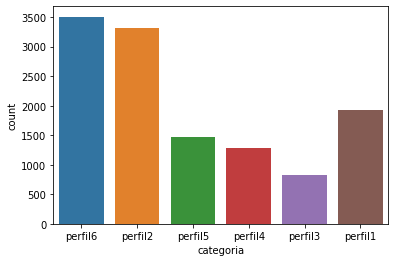

In [188]:
#Grafico
import seaborn as sns
ax = sns.countplot(x="categoria", data=df_training)

# Atenção!

A coluna **categoria** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [189]:
df_training.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados', 'categoria',
       'profissao_0', 'profissao_Advogado', 'profissao_Analista',
       'profissao_Analista Senior', 'profissao_Assessor',
       'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
       'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
       'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário'],
      dtype='object')

In [190]:
features = df_training[
    [
        'pretende_fazer_cursos_lit', 'interesse_mba_lit',
        'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
        'modulos_iniciados', 'modulos_finalizados', 'certificados',
        'profissao_0', 'profissao_Advogado', 'profissao_Analista',
        'profissao_Analista Senior', 'profissao_Assessor',
        'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
        'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
        'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário'
    ]
]
target = df_training['categoria']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

# Preparação dos argumentos para os métodos da biblioteca ``scikit-learn``
X =features 
y =target

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=133)

### Treinando uma árvore de decisão

In [192]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

In [193]:
# Target - Dataset
predict_train =dtc.predict(X_train)
print('\nTarget alcançada ',predict_train) 
 
# Acurácia alcançada pela árvore de decisão
accuracy_train = accuracy_score(y_train,predict_train)
print('\nAcurácia alcançada : {}%'.format(100*round(accuracy_train), 2))
 
# prever o alvo no conjunto de dados de teste
predict_test = dtc.predict(X_test)
print('\nTarget alcançada nos dados:',predict_test)

 
# Acurácia alcançada pela árvore de decisão - Teste
accuracy_test = accuracy_score(y_test,predict_test)
print('\nAcurácia alcançada no teste:{}%'.format(100*round(accuracy_test), 2))


Target alcançada  ['perfil6' 'perfil6' 'perfil5' ... 'perfil6' 'perfil6' 'perfil2']

Acurácia alcançada : 100.0%

Target alcançada nos dados: ['perfil2' 'perfil1' 'perfil2' ... 'perfil6' 'perfil6' 'perfil1']

Acurácia alcançada no teste:100.0%


### Fazendo previsões na amostra de teste

In [194]:
y_pred = dtc.predict(X_test)
print(y_pred)

['perfil2' 'perfil1' 'perfil2' ... 'perfil6' 'perfil6' 'perfil1']


### Analisando a qualidade do modelo através da matriz de confusão

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

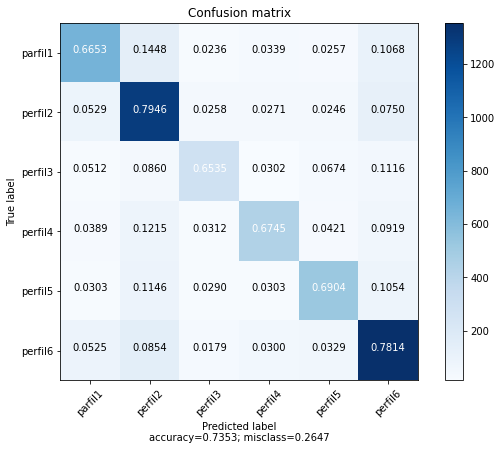

In [196]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

# **Gera** dados sintéticos da classe minoritária.

Instância o SMOTE

In [197]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [198]:
y_train_SMOTE.value_counts()

perfil4    1773
perfil2    1773
perfil1    1773
perfil5    1773
perfil6    1773
perfil3    1773
Name: categoria, dtype: int64

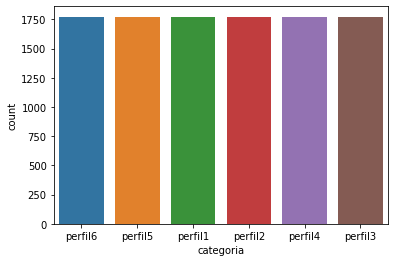

In [199]:
ax = sns.countplot(y_train_SMOTE)

In [200]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [201]:
    dtc.fit(X_train_SMOTE, y_train_SMOTE)
    preds = dtc.predict(X_test)
    scores = cross_val_score(dtc, X_train_SMOTE, y_train_SMOTE, cv=3, scoring="accuracy")
    diff = scores.mean() - dtc.score(X_test, y_test)
    SD = diff / scores.std()

In [202]:
    print(f"Training Score:{dtc.score(X_train, y_train)}")
    print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    print(f"Testing Score: {dtc.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

Training Score:0.9231018818948734
Cross V Score: 0.7699755593156609 +/- 0.04637084192240974
Testing Score: 0.735117599351176
Cross & Test Diff: 0.03485795996448482
Standard Deviations Away: 0.7517215241166224
[[ 657  101   28   44   36  108]
 [ 100 1219   70   77   56  104]
 [  22   37  302   10   17   42]
 [  24   59   32  434   35   58]
 [  29   79   25   20  531   75]
 [  73  125   48   48   51 1389]]


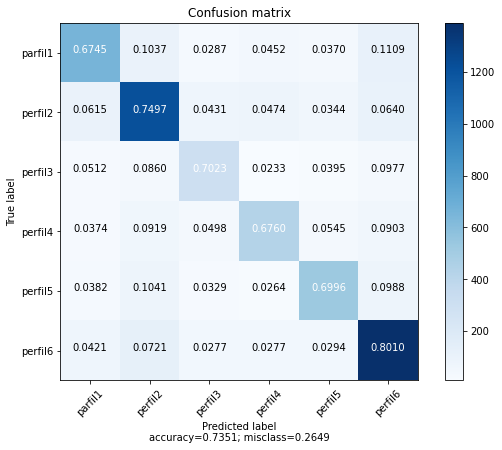

In [203]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, preds), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

In [204]:
# prever o alvo no conjunto de dados de teste
preds = dtc.predict(X_test)
print('\nTarget alcançada nos dados:',preds)


Target alcançada nos dados: ['perfil3' 'perfil6' 'perfil2' ... 'perfil6' 'perfil6' 'perfil1']


In [205]:
print (pd.crosstab(y_test, preds, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  perfil1  perfil2  perfil3  perfil4  perfil5  perfil6   All
Real                                                               
perfil1      657      101       28       44       36      108   974
perfil2      100     1219       70       77       56      104  1626
perfil3       22       37      302       10       17       42   430
perfil4       24       59       32      434       35       58   642
perfil5       29       79       25       20      531       75   759
perfil6       73      125       48       48       51     1389  1734
All          905     1620      505      633      726     1776  6165


In [206]:
#Checa a acurácia do modelo
accuracy_score(y_test, preds)

0.735117599351176

In [207]:
#Recall
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

     perfil1       0.73      0.67      0.70       974
     perfil2       0.75      0.75      0.75      1626
     perfil3       0.60      0.70      0.65       430
     perfil4       0.69      0.68      0.68       642
     perfil5       0.73      0.70      0.72       759
     perfil6       0.78      0.80      0.79      1734

    accuracy                           0.74      6165
   macro avg       0.71      0.72      0.71      6165
weighted avg       0.74      0.74      0.74      6165



In [208]:
#Matriz de Confusão
print (pd.crosstab(y_test, preds, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  perfil1  perfil2  perfil3  perfil4  perfil5  perfil6   All
Real                                                               
perfil1      657      101       28       44       36      108   974
perfil2      100     1219       70       77       56      104  1626
perfil3       22       37      302       10       17       42   430
perfil4       24       59       32      434       35       58   642
perfil5       29       79       25       20      531       75   759
perfil6       73      125       48       48       51     1389  1734
All          905     1620      505      633      726     1776  6165


## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [209]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-18 18:25:41--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96291 (94K) [text/plain]
Saving to: ‘to_be_scored.csv’

to_be_scored.csv    100%[===================>]  94.03K  --.-KB/s    in 0.02s   

2020-09-18 18:25:42 (5.54 MB/s) - ‘to_be_scored.csv’ saved [96291/96291]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [210]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          1000 non-null   int64 
 1   graduacao                   1000 non-null   object
 2   universidade                1000 non-null   object
 3   profissao                   1000 non-null   object
 4   organizacao                 1000 non-null   object
 5   pretende_fazer_cursos_lit   1000 non-null   int64 
 6   interesse_mba_lit           1000 non-null   int64 
 7   importante_ter_certificado  1000 non-null   int64 
 8   horas_semanais_estudo       1000 non-null   int64 
 9   como_conheceu_lit           1000 non-null   object
 10  total_modulos               1000 non-null   int64 
 11  modulos_iniciados           1000 non-null   int64 
 12  modulos_finalizados         1000 non-null   int64 
 13  certificados                1000 non-null   int64

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [211]:
# 1 - Removendo linhas com valores NaN em "certificados" e "total_modulos"
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['id', 'graduacao', 'universidade', 'organizacao', 'como_conheceu_lit'], inplace=False)

# 4 - Encoding com "dummy variables"
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['profissao'])

df_to_be_scored_4.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,profissao_Advogado,profissao_Analista,profissao_Analista Senior,profissao_Assessor,profissao_Coordenador,profissao_Diretor,profissao_Engenheiro,profissao_Gerente,profissao_Outros,profissao_SEM EXPERIÊNCIA,profissao_Supervisor,profissao_Sócio/Dono/Proprietário
995,0,0,1,2,245,63,45,1,0,0,0,0,1,0,0,0,0,0,0,0
996,1,1,1,8,163,111,96,0,0,0,0,1,0,0,0,0,0,0,0,0
997,1,1,1,9,56,10,4,0,0,0,0,0,0,0,0,1,0,0,0,0
998,1,1,1,9,138,60,30,0,0,0,0,0,0,0,0,0,1,0,0,0
999,0,0,1,9,22,20,19,0,1,0,0,0,0,0,0,0,0,0,0,0


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [212]:
df_training[
    [
        'pretende_fazer_cursos_lit', 'interesse_mba_lit',
        'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
        'modulos_iniciados', 'modulos_finalizados', 'certificados',
        'profissao_0', 'profissao_Advogado', 'profissao_Analista',
        'profissao_Analista Senior', 'profissao_Assessor',
        'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
        'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
        'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário'
    ]
].columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'profissao_0', 'profissao_Advogado', 'profissao_Analista',
       'profissao_Analista Senior', 'profissao_Assessor',
       'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
       'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
       'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário'],
      dtype='object')

In [213]:
df_to_be_scored_4.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'profissao_Advogado', 'profissao_Analista', 'profissao_Analista Senior',
       'profissao_Assessor', 'profissao_Coordenador', 'profissao_Diretor',
       'profissao_Engenheiro', 'profissao_Gerente', 'profissao_Outros',
       'profissao_SEM EXPERIÊNCIA', 'profissao_Supervisor',
       'profissao_Sócio/Dono/Proprietário'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [214]:
df_to_be_scored_4['profissao_0'] = 0

In [215]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['target'] =y_pred
df_to_be_scored_4.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,profissao_Advogado,profissao_Analista,profissao_Analista Senior,profissao_Assessor,profissao_Coordenador,profissao_Diretor,profissao_Engenheiro,profissao_Gerente,profissao_Outros,profissao_SEM EXPERIÊNCIA,profissao_Supervisor,profissao_Sócio/Dono/Proprietário,profissao_0,target
995,0,0,1,2,245,63,45,1,0,0,0,0,1,0,0,0,0,0,0,0,0,perfil1
996,1,1,1,8,163,111,96,0,0,0,0,1,0,0,0,0,0,0,0,0,0,perfil2
997,1,1,1,9,56,10,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,perfil6
998,1,1,1,9,138,60,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,perfil2
999,0,0,1,9,22,20,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,perfil3


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [224]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
